# Buisness understanding

![Texte alternatif…](https://scontent.ftun11-1.fna.fbcdn.net/v/t1.15752-9/74602853_1008052032865990_8680731935804227584_n.png?_nc_cat=110&_nc_oc=AQkTBAiHD7SrdIv7D7q1g4spIxFl5sg70JbqlqwclXK1ruiqWgUC6FlCYDOd4gB853I&_nc_ht=scontent.ftun11-1.fna&oh=fd45639c4164bba3af0a540c66822b96&oe=5E5B0FB7)

![Texte alternatif…](https://scontent.ftun11-1.fna.fbcdn.net/v/t1.15752-9/74667905_2233434680280712_7692050800935174144_n.png?_nc_cat=108&_nc_oc=AQm9j9cu_eLNazb8rME-svyHJcALdGobOnj7NIshVtzHD7-rplPMtWOZ0IK-DX2BnLY&_nc_ht=scontent.ftun11-1.fna&oh=24ef75af7c5de147c04405549b5aa5eb&oe=5E489B91)

# Data preprocessing 

### Exploring the raw data


![alt text](https://cdn.discordapp.com/attachments/302855553619591168/640627385632423937/unknown.png)

 
*   VariableDefinitions.csv : contains detailed explanation of the labels  
*   SubmissionFile.csv : the format of the submission
*   Train_v2.csv : complete dataset for training
*   Test_v2.csv : data missing the target (bank_account) to use as validation set and submit the result

 **Here's a link for the competition** [**Zindi.africa**](https://zindi.africa/competitions/financial-inclusion-in-africa/data)







In [0]:
import pandas as pd 
dataset_Train = pd.read_csv("Train_v2.csv")
dataset_Test = pd.read_csv("Test_v2.csv")
dataset_Test_OG = pd.read_csv("Test_v2.csv")
var = pd.read_csv("VariableDefinitions.csv")

In [0]:
pd.options.display.max_colwidth = 200 #Changing parameters to be able to display long sentences

In [0]:
var

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,"The interviewee’s relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know"
9,marital_status,"The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don’t know"


* To get a general idea about the data we are working with we can try to plot some graphs that helps us better visualize it and try to find some correlation between the features

Text(0, 0.5, 'num people')

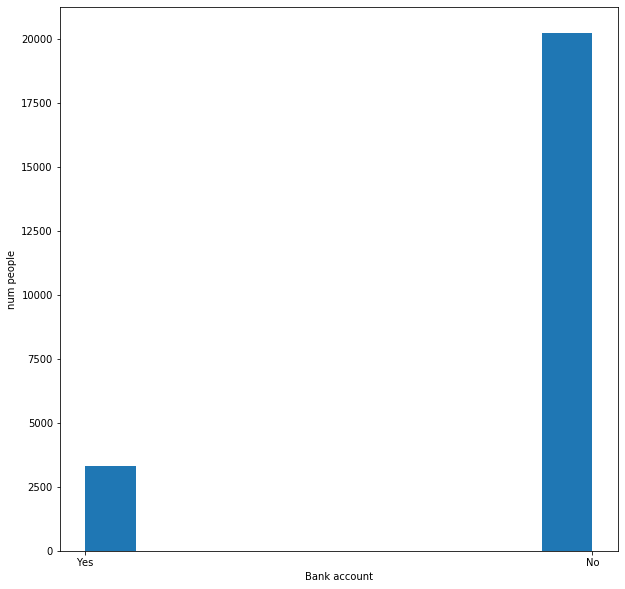

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
 
figure(num=None, figsize=(10, 10))
plt.hist(dataset_Train['bank_account'])
plt.xlabel('Bank account')
plt.ylabel('num people')



*   Approximately 88% of the people interviewed don't have a bank account





---




*   Now we can try to find the impact of ones country of residence in the likelihood of having a bank account






In [0]:
yes = dataset_Train[dataset_Train['bank_account']=='Yes']['country'].value_counts() #counts the number of people with bank accounts in each country
no  = dataset_Train[dataset_Train['bank_account']== 'No']['country'].value_counts() #counts the number of people with no bank accounts in each country

In [0]:
yes

Kenya       1521
Rwanda      1003
Tanzania     607
Uganda       181
Name: country, dtype: int64

In [0]:
no

Rwanda      7732
Tanzania    6013
Kenya       4547
Uganda      1920
Name: country, dtype: int64

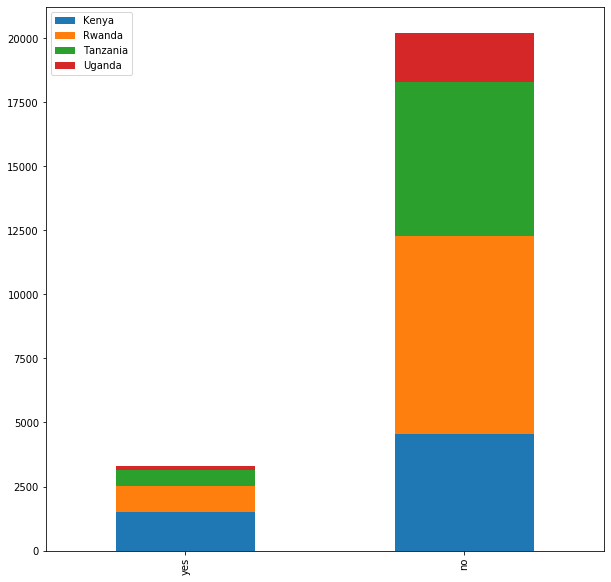

In [0]:
country = pd.DataFrame([yes, no])
country.index = ['yes', 'no']
country.plot(kind = 'bar', stacked = True, figsize = (10,10))



---



*   We can do the same with other features like job_type or gender


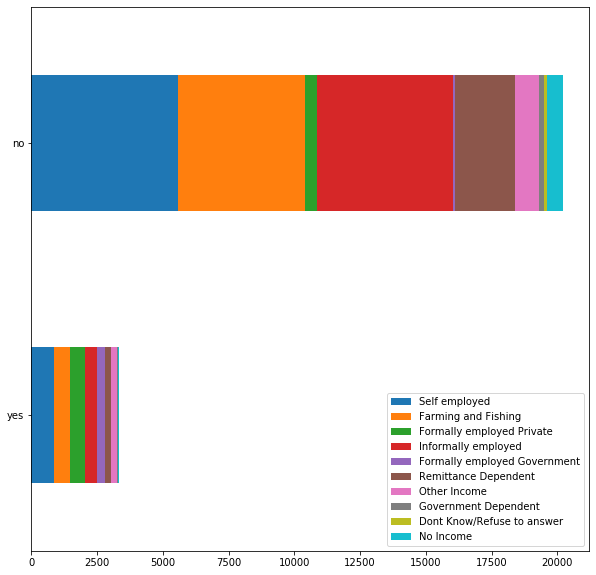

In [0]:
#Doing the same this time with job_type
yes_job = dataset_Train[dataset_Train['bank_account']=='Yes']['job_type'].value_counts() 
no_job= dataset_Train[dataset_Train['bank_account']== 'No']['job_type'].value_counts()
age = pd.DataFrame([yes_job, no_job])
age.index = ['yes', 'no']
age.plot(kind = 'barh', stacked = True, figsize = (10,10))

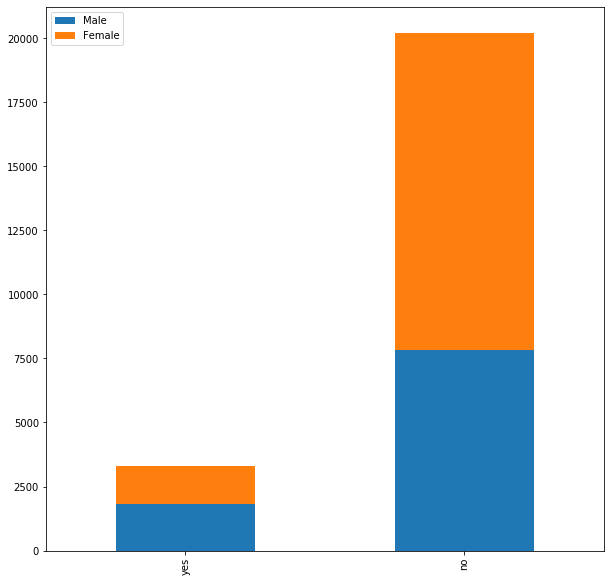

In [0]:
#Doing the same this time with gender_of_respondent
yes_gender = dataset_Train[dataset_Train['bank_account']=='Yes']['gender_of_respondent'].value_counts() 
no_gender= dataset_Train[dataset_Train['bank_account']== 'No']['gender_of_respondent'].value_counts()
age = pd.DataFrame([yes_gender, no_gender])
age.index = ['yes', 'no']
age.plot(kind = 'bar', stacked = True, figsize = (10,10))

### Data normalization

In [0]:
dataset_Train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
dataset_Train.isna().sum() #Checking for missing values

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

For better performance of our model we need to keep numerical values between 0 and 1

In [0]:
dataset_Train.max() #displays the max of every column

country                                            Uganda
year                                                 2018
uniqueid                                     uniqueid_999
bank_account                                          Yes
location_type                                       Urban
cellphone_access                                      Yes
household_size                                         21
age_of_respondent                                     100
gender_of_respondent                                 Male
relationship_with_head                             Spouse
marital_status                                    Widowed
education_level           Vocational/Specialised training
job_type                                    Self employed
dtype: object

In [0]:
#We devide every value by the max of its respective column
dataset_Train['age_of_respondent'] = dataset_Train['age_of_respondent']/100
dataset_Train['household_size'] = dataset_Train['household_size']/21
dataset_Test['age_of_respondent'] = dataset_Test['age_of_respondent']/100
dataset_Test['household_size'] = dataset_Test['household_size']/21

### Encoding dummy variables



*   Scikit-learn will not accept **categorical features** by default
*   We need to encode them numerically 
*   Convert them to 'dummy varriables' where **1** means the row was in that categroy.  
![Texte alternatif…](https://www.machinelearningplus.com/wp-content/uploads/2018/03/one-hot-encoding.png)



In [0]:
dummies = ['location_type', 'education_level','relationship_with_head','gender_of_respondent','cellphone_access','cellphone_access','job_type','marital_status','country','year']

In [0]:
dataset_Train_dummied = pd.get_dummies(dataset_Train, columns=dummies)
dataset_Test_dummied = pd.get_dummies(dataset_Test, columns=dummies)

In [0]:
dataset_Train_dummied['bank_account'] = dataset_Train_dummied['bank_account'].map( {'Yes': 1, 'No': 0} ).astype(int)

In [0]:
dataset_Train_dummied = dataset_Train_dummied.drop('uniqueid', axis=1)
dataset_Test_dummied = dataset_Test_dummied.drop('uniqueid', axis=1)

In [0]:
dataset_Train_dummied.head()

,bank_account,household_size,age_of_respondent,location_type_Rural,location_type_Urban,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,gender_of_respondent_Female,gender_of_respondent_Male,cellphone_access_No,cellphone_access_Yes,cellphone_access_No,cellphone_access_Yes,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,year_2016,year_2017,year_2018
0,1,0.142857,0.24,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
1,0,0.238095,0.70,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
2,1,0.238095,0.26,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
3,0,0.238095,0.34,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4,0,0.380952,0.26,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1


In [0]:
dataset_Test_dummied.head()

,household_size,age_of_respondent,location_type_Rural,location_type_Urban,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,gender_of_respondent_Female,gender_of_respondent_Male,cellphone_access_No,cellphone_access_Yes,cellphone_access_No,cellphone_access_Yes,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,year_2016,year_2017,year_2018
0,0.142857,0.30,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1,0.333333,0.51,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
2,0.142857,0.77,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
3,0.285714,0.39,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
4,0.142857,0.16,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1


### Separating features (X) and target (y)

In [0]:
X=dataset_Train_dummied.loc[:, dataset_Train_dummied.columns != 'bank_account']
y=dataset_Train_dummied.iloc[:,0]

In [0]:
X.head()

,household_size,age_of_respondent,location_type_Rural,location_type_Urban,education_level_No formal education,education_level_Other/Dont know/RTA,education_level_Primary education,education_level_Secondary education,education_level_Tertiary education,education_level_Vocational/Specialised training,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,gender_of_respondent_Female,gender_of_respondent_Male,cellphone_access_No,cellphone_access_Yes,cellphone_access_No,cellphone_access_Yes,job_type_Dont Know/Refuse to answer,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,marital_status_Divorced/Seperated,marital_status_Dont know,marital_status_Married/Living together,marital_status_Single/Never Married,marital_status_Widowed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,year_2016,year_2017,year_2018
0,0.142857,0.24,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
1,0.238095,0.70,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
2,0.238095,0.26,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
3,0.238095,0.34,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4,0.380952,0.26,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1


# Model creation

## Importing needed dependencies

Now that we cleaned our data, it's time to import machine learning models that we are going to compare in order to find the best one fit for our problem

In [0]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score

## Spliting dataset_Train into train and test



---
Let's split our data 80% for training and 20% for testing


In [0]:
X_train,X_test,y_train,y_test=  train_test_split(X,y,test_size=0.2,random_state=10)

## Trying Decision tree



---


Let's start with Decision tree



In [0]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [0]:
y_pred = clf.predict(X_test)

In [0]:
accuracy = accuracy_score(y_test,y_pred)

In [0]:
accuracy

0.8295430393198725

## Model saving and loading

In [0]:
import pickle
pickle.dump(clf, open("model_tree.pkl",'wb'))

In [0]:
model = pickle.load(open("model_tree.pkl",'rb'))

## Using the model on validation data

In [0]:
X_val = dataset_Test_dummied

In [0]:
y_val = model.predict(X_val)

In [0]:
y_val

array([1, 1, 0, ..., 0, 0, 0])

## K-folds and cross validation



---


* Model performance is dependant on how the data was split which may cause a problem with it's ability to generalize.  
* To solve this problem we use a technique called **cross-validation**.
* We split the data in k-groups (or folds) hold the 1st one as a test set and use the rest in training and we repeat this process for k-iterations. 

![Texte alternatif…](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/1200px-K-fold_cross_validation_EN.svg.png)

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state  =0)

Now we will be trying various models using cross-validation and look for the best overall score

In [0]:
tree = tree.DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(tree, X, y, cv= k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83552911 0.83807905 0.8521037  0.84062898 0.84141156 0.84481293
 0.83758503 0.83205782 0.82908163 0.83673469]


In [0]:
import numpy as np
(np.mean(score))

0.838802451494835

In [0]:
forest = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(forest, X, y, cv= k_fold, scoring=scoring)
print(score)

[0.85805355 0.85422864 0.87717807 0.86570336 0.86352041 0.86947279
 0.86309524 0.85459184 0.8664966  0.86096939]


In [0]:
(np.mean(score))

0.8633309879412879

In [0]:
knn = KNeighborsClassifier(n_neighbors = 5)
scoring = 'accuracy'
score = cross_val_score(knn, X, y, cv= k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.86995325 0.87505312 0.87930302 0.8759031  0.87967687 0.88095238
 0.88052721 0.88095238 0.87840136 0.86522109]


In [0]:
(np.mean(score))

0.876594378720464

## Searching for the best n_neighbors 

### Using the for loop

In [0]:
k_scores = []
for i in range(10,40) :   
    knn = KNeighborsClassifier(n_neighbors = i)
    scoring = 'accuracy'
    score = cross_val_score(knn, X, y, cv = k_fold, scoring = scoring)  
    k_scores.append(np.mean(score))
print(k_scores)

[0.8821626249309753, 0.8817370934774249, 0.8827152014652014, 0.8837354470049812, 0.8837780182196127, 0.8848830086645793, 0.8837354470049814, 0.8846279969701436, 0.8843305586152862, 0.8841606170730086, 0.8839904586994167, 0.8843305947538387, 0.8843731478991937, 0.8851382371903286, 0.8844581096356945, 0.8853084136331966, 0.8850532754538281, 0.884925850918353, 0.8851383094674332, 0.885605960403711, 0.8847133381614439, 0.8854359646536049, 0.8848835146043118, 0.8850959731533923, 0.885223469965972, 0.8858186357841055, 0.8847558009604182, 0.8852234338274197, 0.8847132839536155, 0.884755891306799]


Text(0, 0.5, 'Cross-Validated Accuracy')

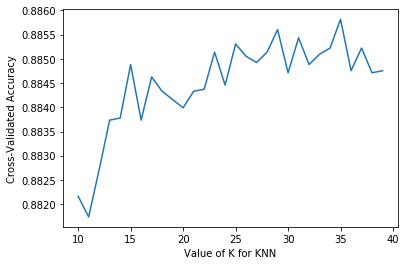

In [0]:
k_range = range(10, 40)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### Using GridSearchCV 

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(30, 40)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=10,scoring = 'accuracy')
knn_cv.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [0]:
df = pd.DataFrame.from_dict(knn_cv.cv_results_) #We save the results into a dataframe

In [0]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.249668,0.008581,1.939374,0.424449,30,{'n_neighbors': 30},0.843670,0.847918,0.889456,0.882653,0.887330,0.871173,0.863095,0.877551,0.889881,0.879252,0.873193,0.015828,4
1,0.244916,0.006025,1.943878,0.425180,31,{'n_neighbors': 31},0.841971,0.838573,0.891156,0.884354,0.886905,0.873724,0.864371,0.877126,0.891156,0.880952,0.873023,0.018128,6
2,0.247859,0.008115,1.972215,0.425580,32,{'n_neighbors': 32},0.842821,0.844095,0.889456,0.886054,0.888605,0.871173,0.863946,0.875850,0.889031,0.880102,0.873108,0.016831,5
3,0.246812,0.007931,1.975153,0.410000,33,{'n_neighbors': 33},0.841546,0.842821,0.892432,0.882228,0.888605,0.872874,0.864796,0.876701,0.889031,0.881803,0.873278,0.017385,3
4,0.246213,0.006048,1.985435,0.426969,34,{'n_neighbors': 34},0.843670,0.845370,0.890731,0.884354,0.889881,0.871599,0.863520,0.875850,0.888605,0.880952,0.873448,0.016606,2


Text(0, 0.5, 'Cross-Validated Accuracy')

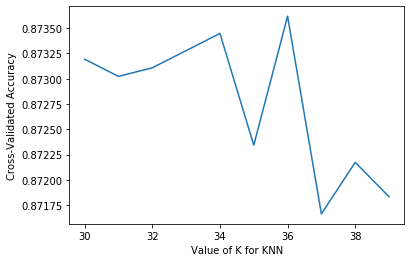

In [0]:
plt.plot(df['param_n_neighbors'], df['mean_test_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [0]:
knn_best = KNeighborsClassifier(n_neighbors = 35)

scoring = 'accuracy'

score = cross_val_score(knn_best, X, y, cv = k_fold, n_jobs = 1, scoring = scoring)

print(score)

[0.87717807 0.88567786 0.89502762 0.8878028  0.88520408 0.88903061
 0.8877551  0.88477891 0.88690476 0.87882653]


In [0]:
(np.mean(score))

0.8858186357841055

In [0]:
knn_best.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

In [0]:
prediction = knn_best.predict(dataset_Test_dummied)

## SVM (Support Vector Machine)

### Trying standard SVM

In [0]:
from sklearn.svm import SVC

svm = SVC()
scoring = 'accuracy'
score = cross_val_score(svm, X, y, cv= k_fold, n_jobs=1, scoring=scoring)
print(score)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

[0.87887803 0.88142796 0.88865278 0.88822779 0.87840136 0.8877551
 0.8877551  0.88562925 0.88477891 0.87840136]


In [0]:
import numpy as np

np.mean(score)

0.8839907658771115

### Looking for the best parameters using Grid search

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel': ('linear', 'rbf','poly'),'gamma': [0.001, 0.01, 0.1, 1],'C':[0.001, 0.01, 0.1, 1, 10]}
svm = SVC()
svm_cv = GridSearchCV(svm, param_grid, cv=10)
svm_cv.fit(X, y)

In [0]:
df = pd.DataFrame.from_dict(svm_cv.cv_results_)

In [0]:
svm_cv.best_params_

In [0]:
svm = SVC(kernel='linear',C=0.01,gamma = 0.001)
scoring = 'accuracy'
score = cross_val_score(svm, X, y, cv= k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.87122822 0.87462813 0.880153   0.88525287 0.87117347 0.88180272
 0.8835034  0.88052721 0.875      0.87372449]


In [0]:
np.mean(score)

0.8776993510961546

## Generating the submission file

In [0]:
submission = pd.DataFrame({"uniqueid": dataset_Test_OG["uniqueid"] + " x " + dataset_Test_OG["country"],

"bank_account": abs(prediction)

})

submission.to_csv("submission.csv", index = False)